In [4]:
import numpy as np
import pandas as pd
import re #regular expression library for searching words in text/paragraph
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
data_path ='/content/drive/MyDrive/000A SKRIPSI/SKRIPSI CODE/Data_AllCollumnMerged/MERGED_SELFLABELDATA_BERT - Sheet1.csv'
data=pd.read_csv(data_path)
data.head()

,link,judul,penulis,tanggal,narasi,relevansi,rev_sektor,frasa,scope,pdb _movement,growth,lag,time_ref
0,https://www.detik.com/jatim/berita/d-6259971/c...,Cara Efisien Pemkab Banyuwangi Kendalikan Hama...,Ardian Fanani - detikJatim,"Senin, 29 Agu 2022 11:37 WIB",Kabupaten Banyuwangi mengendalikan hama tikus ...,1,A,Banyuwangi menyiapkan 342 rubuha yang akan dis...,"banyuwangi, jawa timur",up,0,0,Q3
1,https://finance.detik.com/properti/d-6248265/f...,"Food Estate Jokowi Tambah Banyak, Terbaru Lumb...",Shafira Cendra Arini - detikFinance,"Senin, 22 Agu 2022 20:45 WIB",Sejak 2020 Presiden Joko Widodo (Jokowi) telah...,1,A,"food estate di Pulau Jawa. Di pulau ini, ada ...",Nasional,UP,y,0,Q3
2,https://finance.detik.com/berita-ekonomi-bisni...,Mirisnya Nasib Petani Kala RI Berhasil Swasemb...,Herdi Alif Al Hikam - detikFinance,"Senin, 15 Agu 2022 19:00 WIB",Indonesia mampu melakukan swasembada beras. Da...,1,A,Indonesia mampu melakukan swasembada beras. Da...,Nasional,up,y,0,Q3
3,https://finance.detik.com/berita-ekonomi-bisni...,"Miris! RI Berhasil Swasembada Beras, tapi Nasi...",Herdi Alif Al Hikam - detikFinance,"Senin, 15 Agu 2022 13:02 WIB",Indonesia dinilai mampu melakukan swasembada b...,1,A,Zulhas memaparkan dalam tiga tahun terakhir In...,Nasional,up,y,0,Q3
4,https://www.detik.com/jabar/bisnis/d-6232506/h...,Hore! Nelayan Indramayu Kini Punya Gudang Beku...,Jihaan Khoirunnisaa - detikJabar,"Sabtu, 13 Agu 2022 10:18 WIB",Menteri Kelautan dan Perikanan (Menteri KP RI)...,1,A,Indramayu memiliki potensi pengelolaan sumber...,"Indramayu, Jawa Barat",UP,0,0,Q3


In [23]:
# merging narasi, frasa, rev_sektor, pdb_movement
data['content'] = data['judul']+' '+data['narasi']+' '+data['frasa']+' '+data['rev_sektor']
data['content'].head()

0    Cara Efisien Pemkab Banyuwangi Kendalikan Hama...
1    Food Estate Jokowi Tambah Banyak, Terbaru Lumb...
2    Mirisnya Nasib Petani Kala RI Berhasil Swasemb...
3    Miris! RI Berhasil Swasembada Beras, tapi Nasi...
4    Hore! Nelayan Indramayu Kini Punya Gudang Beku...
Name: content, dtype: object

In [24]:
data.head()

,link,judul,penulis,tanggal,narasi,relevansi,rev_sektor,frasa,scope,pdb _movement,growth,lag,time_ref,content
0,https://www.detik.com/jatim/berita/d-6259971/c...,Cara Efisien Pemkab Banyuwangi Kendalikan Hama...,Ardian Fanani - detikJatim,"Senin, 29 Agu 2022 11:37 WIB",Kabupaten Banyuwangi mengendalikan hama tikus ...,1,A,Banyuwangi menyiapkan 342 rubuha yang akan dis...,"banyuwangi, jawa timur",up,0,0,Q3,Cara Efisien Pemkab Banyuwangi Kendalikan Hama...
1,https://finance.detik.com/properti/d-6248265/f...,"Food Estate Jokowi Tambah Banyak, Terbaru Lumb...",Shafira Cendra Arini - detikFinance,"Senin, 22 Agu 2022 20:45 WIB",Sejak 2020 Presiden Joko Widodo (Jokowi) telah...,1,A,"food estate di Pulau Jawa. Di pulau ini, ada ...",Nasional,UP,y,0,Q3,"Food Estate Jokowi Tambah Banyak, Terbaru Lumb..."
2,https://finance.detik.com/berita-ekonomi-bisni...,Mirisnya Nasib Petani Kala RI Berhasil Swasemb...,Herdi Alif Al Hikam - detikFinance,"Senin, 15 Agu 2022 19:00 WIB",Indonesia mampu melakukan swasembada beras. Da...,1,A,Indonesia mampu melakukan swasembada beras. Da...,Nasional,up,y,0,Q3,Mirisnya Nasib Petani Kala RI Berhasil Swasemb...
3,https://finance.detik.com/berita-ekonomi-bisni...,"Miris! RI Berhasil Swasembada Beras, tapi Nasi...",Herdi Alif Al Hikam - detikFinance,"Senin, 15 Agu 2022 13:02 WIB",Indonesia dinilai mampu melakukan swasembada b...,1,A,Zulhas memaparkan dalam tiga tahun terakhir In...,Nasional,up,y,0,Q3,"Miris! RI Berhasil Swasembada Beras, tapi Nasi..."
4,https://www.detik.com/jabar/bisnis/d-6232506/h...,Hore! Nelayan Indramayu Kini Punya Gudang Beku...,Jihaan Khoirunnisaa - detikJabar,"Sabtu, 13 Agu 2022 10:18 WIB",Menteri Kelautan dan Perikanan (Menteri KP RI)...,1,A,Indramayu memiliki potensi pengelolaan sumber...,"Indramayu, Jawa Barat",UP,0,0,Q3,Hore! Nelayan Indramayu Kini Punya Gudang Beku...


In [25]:
# separating target label
Y=data['pdb _movement']

print(Y)

0         up
1         UP
2         up
3         up
4         UP
        ... 
1528      up
1529      up
1530      up
1531      up
1532    down
Name: pdb _movement, Length: 1533, dtype: object


In [26]:
# separating feature and target
X = data.drop(columns='pdb _movement', axis=1)
print(X)

                                                   link  \
0     https://www.detik.com/jatim/berita/d-6259971/c...   
1     https://finance.detik.com/properti/d-6248265/f...   
2     https://finance.detik.com/berita-ekonomi-bisni...   
3     https://finance.detik.com/berita-ekonomi-bisni...   
4     https://www.detik.com/jabar/bisnis/d-6232506/h...   
...                                                 ...   
1528  https://news.detik.com/pemilu/d-6214919/ini-8-...   
1529  https://news.detik.com/pemilu/d-6211759/dokume...   
1530  https://finance.detik.com/berita-ekonomi-bisni...   
1531  https://www.detik.com/jatim/berita/d-6300148/u...   
1532  https://www.detik.com/bali/berita/d-6180068/20...   

                                                  judul  \
0     Cara Efisien Pemkab Banyuwangi Kendalikan Hama...   
1     Food Estate Jokowi Tambah Banyak, Terbaru Lumb...   
2     Mirisnya Nasib Petani Kala RI Berhasil Swasemb...   
3     Miris! RI Berhasil Swasembada Beras, tapi Nasi...

In [11]:
port_stem = PorterStemmer()

In [12]:
nltk.download('stopwords')
# printing the stopwords
print(stopwords.words('indonesian'))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z0-9]',' ',content) #exclude the punctuation, cause number still matter in this study
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('indonesian')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [27]:
data['content'] = data['content'].apply(stemming)

In [28]:
data

,link,judul,penulis,tanggal,narasi,relevansi,rev_sektor,frasa,scope,pdb _movement,growth,lag,time_ref,content
0,https://www.detik.com/jatim/berita/d-6259971/c...,Cara Efisien Pemkab Banyuwangi Kendalikan Hama...,Ardian Fanani - detikJatim,"Senin, 29 Agu 2022 11:37 WIB",Kabupaten Banyuwangi mengendalikan hama tikus ...,1,A,Banyuwangi menyiapkan 342 rubuha yang akan dis...,"banyuwangi, jawa timur",up,0,0,Q3,efisien pemkab banyuwangi kendalikan hama tiku...
1,https://finance.detik.com/properti/d-6248265/f...,"Food Estate Jokowi Tambah Banyak, Terbaru Lumb...",Shafira Cendra Arini - detikFinance,"Senin, 22 Agu 2022 20:45 WIB",Sejak 2020 Presiden Joko Widodo (Jokowi) telah...,1,A,"food estate di Pulau Jawa. Di pulau ini, ada ...",Nasional,UP,y,0,Q3,food estat jokowi terbaru lumbung pangan mangg...
2,https://finance.detik.com/berita-ekonomi-bisni...,Mirisnya Nasib Petani Kala RI Berhasil Swasemb...,Herdi Alif Al Hikam - detikFinance,"Senin, 15 Agu 2022 19:00 WIB",Indonesia mampu melakukan swasembada beras. Da...,1,A,Indonesia mampu melakukan swasembada beras. Da...,Nasional,up,y,0,Q3,mirisnya nasib petani ri berhasil swasembada b...
3,https://finance.detik.com/berita-ekonomi-bisni...,"Miris! RI Berhasil Swasembada Beras, tapi Nasi...",Herdi Alif Al Hikam - detikFinance,"Senin, 15 Agu 2022 13:02 WIB",Indonesia dinilai mampu melakukan swasembada b...,1,A,Zulhas memaparkan dalam tiga tahun terakhir In...,Nasional,up,y,0,Q3,miri ri berhasil swasembada bera nasib petani ...
4,https://www.detik.com/jabar/bisnis/d-6232506/h...,Hore! Nelayan Indramayu Kini Punya Gudang Beku...,Jihaan Khoirunnisaa - detikJabar,"Sabtu, 13 Agu 2022 10:18 WIB",Menteri Kelautan dan Perikanan (Menteri KP RI)...,1,A,Indramayu memiliki potensi pengelolaan sumber...,"Indramayu, Jawa Barat",UP,0,0,Q3,hore nelayan indramayu gudang beku berkapasita...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1528,https://news.detik.com/pemilu/d-6214919/ini-8-...,Ini 8 Parpol yang Dinyatakan Lengkap Berkas Pe...,Karin Nur Secha - detikNews,"Rabu, 03 Agu 2022 19:18 WIB",Komisi Pemilihan Umum (KPU) menyatakan delapan...,1,RSTU,Pendaftaran parpol sebagai calon peserta Pemil...,nasional,up,0,0,Q3,8 parpol dinyatakan lengkap berka pendaftaran ...
1529,https://news.detik.com/pemilu/d-6211759/dokume...,"Dokumen Daftar Pemilu Belum Lengkap, 3 Parpol ...",Karin Nur Secha - detikNews,"Selasa, 02 Agu 2022 10:53 WIB",Komisi Pemilihan Umum (KPU) menyeleksi dokumen...,1,RSTU,"Setelah melakukan pengecekan, KPU RI menyataka...",nasional,up,0,0,Q3,dokumen daftar pemilu lengkap 3 parpol kpu ten...
1530,https://finance.detik.com/berita-ekonomi-bisni...,"Produk Kerajinan RI Mejeng di Jepang, Dilirik ...",Aulia Damayanti - detikFinance,"Rabu, 28 Sep 2022 09:31 WIB",Bukan rahasia lagi bahwa produk kerajinan buat...,1,RSTU,pameran tersebut juga mendapatkan sambutan dar...,nasional,up,0,0,Q3,produk kerajinan ri mejeng jepang dilirik pebi...
1531,https://www.detik.com/jatim/berita/d-6300148/u...,Unusa-PENS Gandeng AS Bikin Laboratorium Virtual,Esti Widiyana - detikJatim,"Senin, 19 Sep 2022 15:57 WIB",Konsulat jenderal AS di Surabaya bersama Unive...,1,RSTU,Sementara Platform teknologi dari A.S ini diha...,"Surabaya, jawa timur",up,0,0,Q3,unusa pen gandeng as bikin laboratorium virtua...


In [29]:
content_col = data.drop(['link', 'judul','penulis','tanggal','narasi','relevansi','rev_sektor','frasa','scope','growth','lag','time_ref','pdb _movement'], axis=1)
#content_col = content_col.to_frame()
content_col = content_col.rename(columns = {0:'contents'})
pdb_col = data.drop(['link', 'judul','penulis','tanggal','narasi','relevansi','rev_sektor','frasa','scope','growth','lag','time_ref','content'], axis=1)
#pdb_col = pdb_col.to_frame()
pdb_col = pdb_col.rename(columns = {0:'pdb_movement'})
WorkColumn= pd.concat([content_col, pdb_col], axis=1)
print(WorkColumn)

                                                content pdb _movement
0     efisien pemkab banyuwangi kendalikan hama tiku...            up
1     food estat jokowi terbaru lumbung pangan mangg...            UP
2     mirisnya nasib petani ri berhasil swasembada b...            up
3     miri ri berhasil swasembada bera nasib petani ...            up
4     hore nelayan indramayu gudang beku berkapasita...            UP
...                                                 ...           ...
1528  8 parpol dinyatakan lengkap berka pendaftaran ...            up
1529  dokumen daftar pemilu lengkap 3 parpol kpu ten...            up
1530  produk kerajinan ri mejeng jepang dilirik pebi...            up
1531  unusa pen gandeng as bikin laboratorium virtua...            up
1532  200 pekerja indonesia dipulangkan malaysia 200...          down

[1533 rows x 2 columns]


In [30]:
from google.colab import files
WorkColumn.to_csv('WorkColumnPreprocess.csv', encoding = 'utf-8-sig') 
#files.download('WorkColumnPreprocess.csv')

In [31]:
X = data['content'].values


['efisien pemkab banyuwangi kendalikan hama tiku rumah burung hantu kabupaten banyuwangi mengendalikan hama tiku pertanian burung hantu tyto alba upaya memfasilitasi 342 rumah burung hantu rubuha disebar wilayah pertanian tingkat populasi tikusnya ramah lingkungan mengurangi penggunaan pestisida mendukung pelestarian burung hantu bermanfaat petani hewan predat alami tiku melindungi tanaman petani bupati banyuwangi ipuk fiestiandani senin 29 8 2022 ipuk meninjau lahan pertanian rumah burung hantu difasilitasi pemkab peninjauan program bupati ngantor desa bunga desa desa kedungasri kecamatan tegaldlimo 24 agustu 2022 plt kepala dina pertanian pangan kabupaten banyuwangi m khoiri burung hantu dipilih predat memiliki kemampuan mendeteksi mangsa jarak hewan memiliki pendengaran tajam terbang menyergap mangsanya cepat suara paparnya ukuran tubuhnya relatif beradaptasi lingkungan cepat berkembang biak sehari khoiri burung hantu memangsa tiku hidup 3 5 ekor jangkauan terbang 12 kilomet burung 

In [68]:
print(X)

['efisien pemkab banyuwangi kendalikan hama tiku rumah burung hantu kabupaten banyuwangi mengendalikan hama tiku pertanian burung hantu tyto alba upaya memfasilitasi 342 rumah burung hantu rubuha disebar wilayah pertanian tingkat populasi tikusnya ramah lingkungan mengurangi penggunaan pestisida mendukung pelestarian burung hantu bermanfaat petani hewan predat alami tiku melindungi tanaman petani bupati banyuwangi ipuk fiestiandani senin 29 8 2022 ipuk meninjau lahan pertanian rumah burung hantu difasilitasi pemkab peninjauan program bupati ngantor desa bunga desa desa kedungasri kecamatan tegaldlimo 24 agustu 2022 plt kepala dina pertanian pangan kabupaten banyuwangi m khoiri burung hantu dipilih predat memiliki kemampuan mendeteksi mangsa jarak hewan memiliki pendengaran tajam terbang menyergap mangsanya cepat suara paparnya ukuran tubuhnya relatif beradaptasi lingkungan cepat berkembang biak sehari khoiri burung hantu memangsa tiku hidup 3 5 ekor jangkauan terbang 12 kilomet burung 

In [67]:
data['pdb _movement']=data['pdb _movement'].str.lower()
data['pdb _movement'] = data['pdb _movement'].replace(['up','down'],[1,0])
Y=data['pdb _movement'].values
print(Y)

AttributeError: ignored

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [34]:
dfX_train = pd.DataFrame(X_train)
dfX_train = dfX_train.rename(columns = {0:'X_train'})
dfY_train = pd.DataFrame(Y_train)
dfY_train = dfY_train.rename(columns = {0:'Y_train'})
dfY_train = dfY_train.replace([1,0],['up','down'])
RandTrainData= pd.concat([dfX_train, dfY_train], axis=1)
print(RandTrainData)

                                                X_train Y_train
0     kominfo php lelang frekuensi 2 1 ghz kementeri...    down
1     imi gaet csgi bangun spklu ultra fast charg to...      up
2     hilang top 1000 smak 1 penabur jakarta data be...    down
3     pilu guru smk swasta sepi peminat gaji alih pr...    down
4     hai kpoper pesan gojek kejutan spesial bt anny...      up
...                                                 ...     ...
1221  erick raup cuan jutaan rupiah kerajinan unik b...      up
1222  zulha blusukan gudang pabrik erigo banten ment...      up
1223  300 an sekolah brebe rusak dindikpora diajukan...    down
1224  pemprov dki perbaikan jl mt haryono rasuna sai...      up
1225  kampung budaya karawang senilai rp 40 m terben...      up

[1226 rows x 2 columns]


In [35]:
RandTrainData.to_csv('RandTrainData.csv', encoding = 'utf-8-sig') 
#files.download('RandTrainData.csv')

In [36]:
dfX_test = pd.DataFrame(X_test)
dfX_test = dfX_test.rename(columns = {0:'X_test'})
dfY_test = pd.DataFrame(Y_test)
dfY_test = dfY_test.rename(columns = {0:'Y_test'})
dfY_test = dfY_test.replace([1,0],['up','down'])
RandTestData= pd.concat([dfX_test, dfY_test], axis=1)
print(RandTestData)

                                                X_test Y_test
0    sma ekskul bulutangki pelatihnya candra wijaya...     up
1    berkat proyek rumah nempel stasiun anak usaha ...     up
2    aksi taufik hidayat main bulu tangki bikin war...     up
3    tunggak iuran bpj kesehatan puluhan warga kota...     up
4    tokopedia tren belanja semest i 2022 kategori ...     up
..                                                 ...    ...
302  hutama karya rampungkan konstruksi gedung ojk ...     up
303  pgn tertarik garap sumur ga sinamar sijunjung ...     up
304  beli motor honda cash dipersulit lapor lur kon...   down
305  17 500 rumah 2 kabupaten nikmati sambungan ga ...     up
306  inkai gelar kejuaraan karat alt cup iv 2022 te...     up

[307 rows x 2 columns]


In [37]:
RandTestData.to_csv('RandTestData.csv', encoding = 'utf-8-sig') 
#files.download('RandTestData.csv')

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
train_input = vectorizer.fit_transform(RandTrainData['X_train'])
test_input = vectorizer.transform(RandTestData['X_test'])

In [39]:
len(vectorizer.get_feature_names_out()), vectorizer.get_feature_names_out()[0:20]

(24876, array(['00', '000', '0000', '0002', '000adapun', '000an', '000cc',
        '000jalur', '000total', '001', '002', '003', '004', '005', '006',
        '01', '010', '012', '013', '014'], dtype=object))

# **SVC**

In [47]:
%%time
from sklearn.svm import SVC
model = SVC(random_state=2)
model = model.fit(train_input,  RandTrainData['Y_train'])

CPU times: user 2.35 s, sys: 25.1 ms, total: 2.38 s
Wall time: 2.38 s


In [48]:
#clone forked IndoNLU Github
!git clone 'https://github.com/dindapusparahmi/IndoNLU/'

Cloning into 'IndoNLU'...
remote: Enumerating objects: 500, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 500 (delta 115), reused 142 (delta 111), pack-reused 316
Receiving objects: 100% (500/500), 9.45 MiB | 15.17 MiB/s, done.
Resolving deltas: 100% (235/235), done.


In [51]:
!pip install conlleval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import itertools
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import conlleval
#from .conlleval import conll_evaluation

def document_sentiment_metrics_fn(list_hyp, list_label):
    metrics = {}
    metrics["ACC"] = accuracy_score(list_label, list_hyp)
    metrics["F1"] = f1_score(list_label, list_hyp, average='macro')
    metrics["REC"] = recall_score(list_label, list_hyp, average='macro')
    metrics["PRE"] = precision_score(list_label, list_hyp, average='macro')
    return metrics


In [56]:
%%time
hyps = model.predict(train_input)
document_sentiment_metrics_fn(hyps,  RandTrainData['Y_train'])

CPU times: user 3.17 s, sys: 8.64 ms, total: 3.18 s
Wall time: 4.58 s


{'ACC': 0.9763458401305057,
 'F1': 0.9699675043565448,
 'REC': 0.9618842119240473,
 'PRE': 0.9789521694979433}

In [57]:
%%time
hyps = model.predict(test_input)
document_sentiment_metrics_fn(hyps,RandTestData['Y_test'])

CPU times: user 625 ms, sys: 972 µs, total: 626 ms
Wall time: 633 ms


{'ACC': 0.8013029315960912,
 'F1': 0.7134309629833662,
 'REC': 0.6919978802331743,
 'PRE': 0.7732277526395173}

# **Random Forest**

In [59]:
%%time
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 1000, random_state = 2)
rf_model = rf_model.fit(train_input,  RandTrainData['Y_train'])

CPU times: user 13.1 s, sys: 97 ms, total: 13.2 s
Wall time: 14.7 s


In [60]:
%%time
rf_hyps = rf_model.predict(train_input)
document_sentiment_metrics_fn(rf_hyps,  RandTrainData['Y_train'])

CPU times: user 1.2 s, sys: 972 µs, total: 1.2 s
Wall time: 1.2 s


{'ACC': 1.0, 'F1': 1.0, 'REC': 1.0, 'PRE': 1.0}

In [61]:
%%time
rf_hyps = rf_model.predict(test_input)
document_sentiment_metrics_fn(rf_hyps,RandTestData['Y_test'])

CPU times: user 484 ms, sys: 0 ns, total: 484 ms
Wall time: 483 ms


{'ACC': 0.8175895765472313,
 'F1': 0.7297875015717339,
 'REC': 0.7032591414944356,
 'PRE': 0.8138707037643207}

# **Logistic Regression**

In [62]:
%%time
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=2)
lr_model = lr_model.fit(train_input,  RandTrainData['Y_train'])

CPU times: user 498 ms, sys: 342 ms, total: 840 ms
Wall time: 814 ms


In [63]:
%%time
lr_hyps = lr_model.predict(train_input)
document_sentiment_metrics_fn(lr_hyps,  RandTrainData['Y_train'])

CPU times: user 39.6 ms, sys: 0 ns, total: 39.6 ms
Wall time: 43.4 ms


{'ACC': 0.8482871125611745,
 'F1': 0.7690896276854282,
 'REC': 0.7328143672819014,
 'PRE': 0.8945730938878387}

In [64]:
%%time
lr_hyps = lr_model.predict(test_input)
document_sentiment_metrics_fn(lr_hyps,RandTestData['Y_test'])

CPU times: user 20.1 ms, sys: 0 ns, total: 20.1 ms
Wall time: 30.2 ms


{'ACC': 0.7882736156351792,
 'F1': 0.6568298680974738,
 'REC': 0.6394276629570748,
 'PRE': 0.7989772727272727}

# **5 FOLD CROSS VALIDATION**

In [69]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer = TfidfVectorizer()
X_input = vectorizer.fit_transform(X)

In [70]:
print(Y)

[1 1 1 ... 1 1 0]


In [71]:
cv_score_lr = cross_val_score(LogisticRegression(max_iter=1000, random_state=2), X_input, Y, cv=5)#using Stratified Kfold with k =5 so, each class distribution will be even, similar to the original dataset

print(cv_score_lr)

mean_accuracy_lr = sum(cv_score_lr)/len(cv_score_lr)

mean_accuracy_lr = mean_accuracy_lr*100

mean_accuracy_lr = round(mean_accuracy_lr, 2)

print(mean_accuracy_lr)

[0.68403909 0.6970684  0.71009772 0.73529412 0.78104575]
72.15


In [72]:
#list of the models
from sklearn.neighbors import KNeighborsClassifier
models = [LogisticRegression(max_iter=1000, random_state=2), SVC(kernel='linear', random_state=2), KNeighborsClassifier(), RandomForestClassifier(n_estimators = 1000, random_state = 2)]

In [73]:
def compare_models_cross_validation():

  for model in models:

    cv_score_acc = cross_val_score(model, X_input, Y, cv=5, scoring="accuracy")
    
    mean_accuracy = sum(cv_score_acc)/len(cv_score_acc)

    mean_accuracy = mean_accuracy*100

    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for ', model, '=  ', cv_score_acc)
    print('Accuracy % of the ', model, mean_accuracy)
    print('\n')
    cv_score_precision = cross_val_score(model, X_input, Y, cv=5, scoring="precision")
    
    mean_precision = sum(cv_score_precision)/len(cv_score_precision)

    mean_precision = mean_precision*100

    mean_precision= round(mean_precision, 2)
    print('Cross Validation precisions for ', model, '=  ', cv_score_precision)
    print('precision % of the ', model, mean_precision)
    print('\n')
    cv_score_recall = cross_val_score(model, X_input, Y, cv=5, scoring="recall")
    
    mean_recall = sum(cv_score_recall)/len(cv_score_recall)

    mean_recall = mean_recall*100

    mean_recall = round(mean_recall, 2)

    print('Cross Validation recalls for ', model, '=  ', cv_score_recall)
    print('recall % of the ', model, mean_recall)
    print('\n')
    cv_score_f1 = cross_val_score(model, X_input, Y, cv=5, scoring="f1")
    
    mean_f1 = sum(cv_score_f1)/len(cv_score_f1)

    mean_f1 = mean_f1*100

    mean_f1 = round(mean_f1, 2)

    print('Cross Validation f1-Scores for ', model, '=  ', cv_score_f1)
    print('F1-score % of the ', model, mean_f1)
    print('\n----------------------------------------------\n')
    
    

In [74]:
compare_models_cross_validation()

Cross Validation accuracies for  LogisticRegression(max_iter=1000, random_state=2) =   [0.68403909 0.6970684  0.71009772 0.73529412 0.78104575]
Accuracy % of the  LogisticRegression(max_iter=1000, random_state=2) 72.15


Cross Validation precisions for  LogisticRegression(max_iter=1000, random_state=2) =   [0.71777003 0.72164948 0.72093023 0.73489933 0.77697842]
precision % of the  LogisticRegression(max_iter=1000, random_state=2) 73.44


Cross Validation recalls for  LogisticRegression(max_iter=1000, random_state=2) =   [0.92792793 0.94594595 0.97747748 0.99095023 0.97737557]
recall % of the  LogisticRegression(max_iter=1000, random_state=2) 96.39


Cross Validation f1-Scores for  LogisticRegression(max_iter=1000, random_state=2) =   [0.80943026 0.81871345 0.82982792 0.84393064 0.86573146]
F1-score % of the  LogisticRegression(max_iter=1000, random_state=2) 83.35

----------------------------------------------

Cross Validation accuracies for  SVC(kernel='linear', random_state=2) =   

# **Condusion Matrix for Random Forest**

In [75]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=RandTestData['Y_test'], y_pred=rf_hyps)
conf_matrix

array([[ 38,  47],
       [  9, 213]])

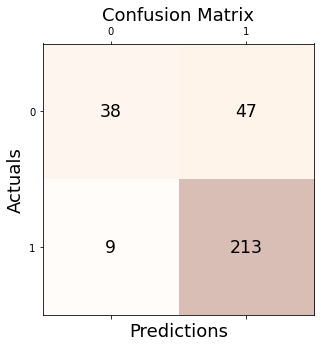

In [76]:
# Print the confusion matrix using Matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()